In [33]:
from models.item import Item
from typing import List
from collections import Counter
import json
import matplotlib.pyplot as plt
import random

In [34]:
DATASET_FILE_PATH = "dataset/amazon_reviews_2023_dataset.jsonl"


def load_dataset(dataset_file_path: str) -> List[Item]:
    items = []
    with open(dataset_file_path, "r") as f:
        for line in f.readlines():
            item = json.loads(line)
            item = Item(**item)
            items.append(item)
    return items


items = load_dataset(dataset_file_path=DATASET_FILE_PATH)
print(f"Total {len(items)} items")

Total 17852 items


In [35]:
prices = [item.price for item in items]
lengths = [len(item.description) for item in items]

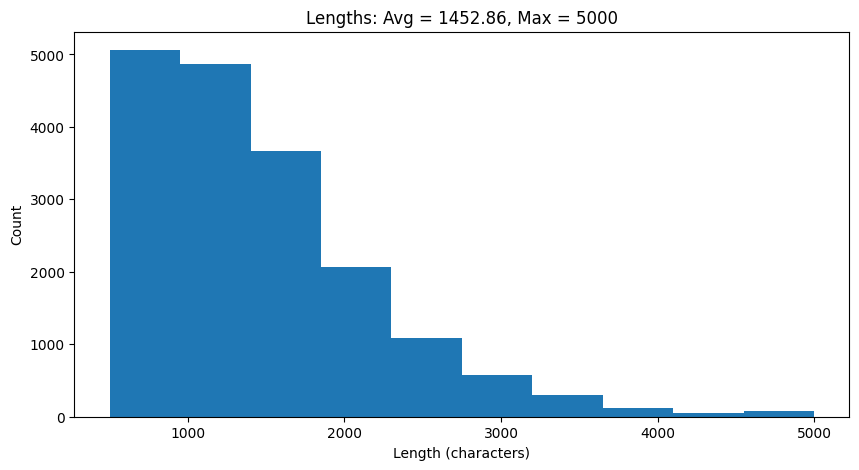

In [36]:
plt.figure(figsize=(10, 5))
plt.title(f"Lengths: Avg = {sum(lengths)/len(lengths):.2f}, Max = {max(lengths)}")
plt.xlabel("Length (characters)")
plt.ylabel("Count")
plt.hist(lengths)
plt.show()

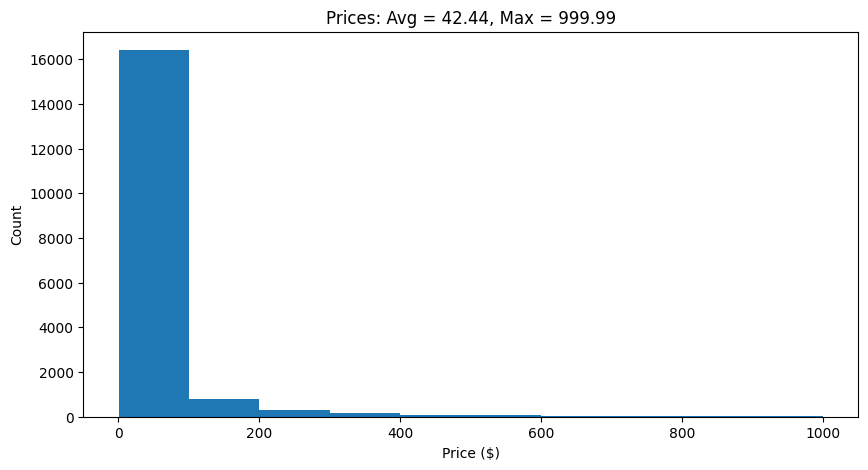

In [37]:
plt.figure(figsize=(10, 5))
plt.title(f"Prices: Avg = {sum(prices)/len(prices):.2f}, Max = {max(prices)}")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.hist(prices)
plt.show()

In [38]:
# Remove duplicates

seen_items = set()
unique_items = []
for item in items:
    if item.title not in seen_items and item.description not in seen_items:
        seen_items.add(item.title)
        seen_items.add(item.description)
        unique_items.append(item)

print(f"Total {len(unique_items)} unique items")

Total 17815 unique items


In [39]:
items = unique_items
prices = [item.price for item in items]
lengths = [len(item.description) for item in items]

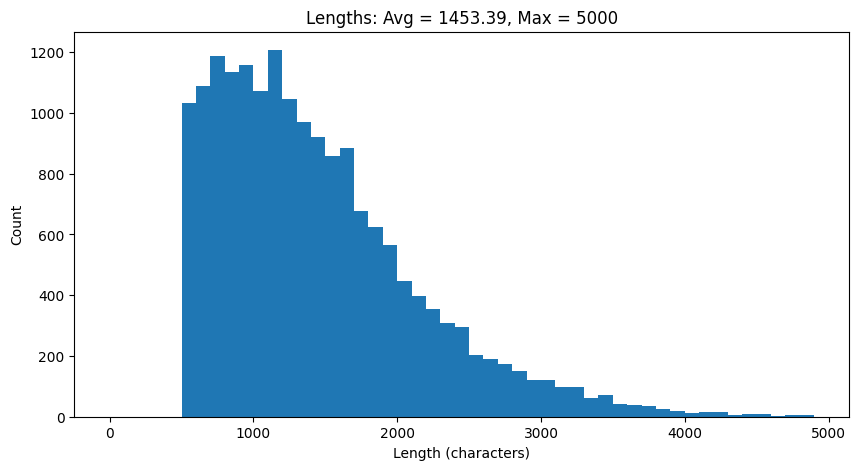

In [40]:
plt.figure(figsize=(10, 5))
plt.title(f"Lengths: Avg = {sum(lengths)/len(lengths):.2f}, Max = {max(lengths)}")
plt.xlabel("Length (characters)")
plt.ylabel("Count")
plt.hist(lengths, bins=range(0, 5000, 100))
plt.show()

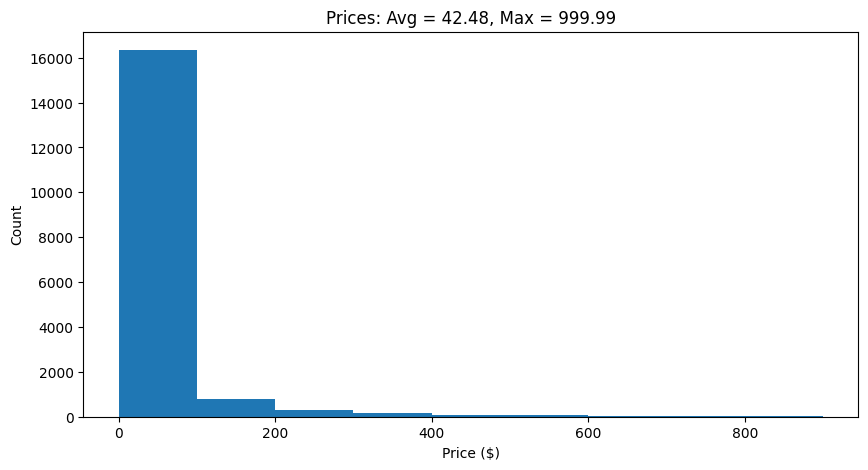

In [41]:
plt.figure(figsize=(10, 5))
plt.title(f"Prices: Avg = {sum(prices)/len(prices):.2f}, Max = {max(prices)}")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.hist(prices, bins=range(0, 1000, 100))
plt.show()

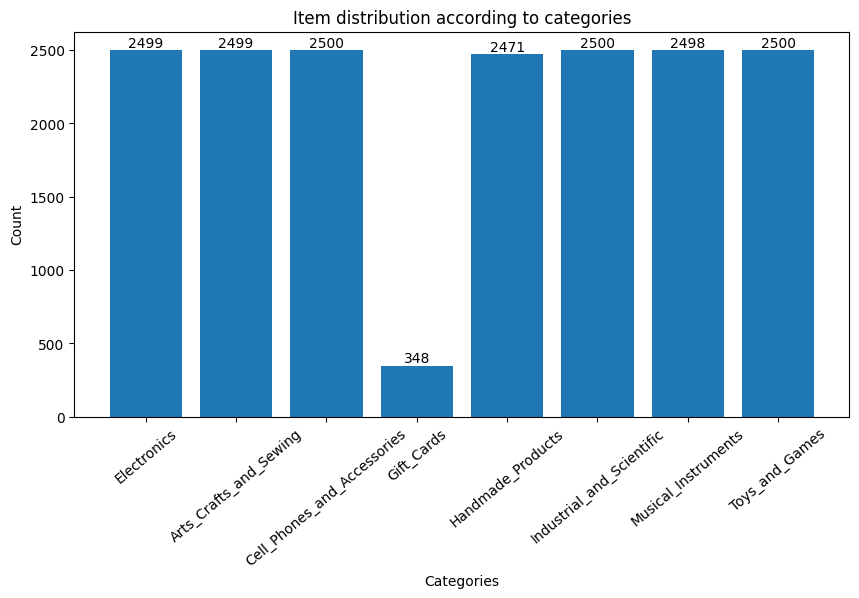

In [42]:
# Distribution according to categories

category_counts = Counter([item.category for item in items])
categories = list(category_counts.keys())
counts = list(category_counts.values())

plt.figure(figsize=(10, 5))
plt.bar(categories, counts)
plt.title("Item distribution according to categories")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.xticks(rotation=40)
for idx, category_name in enumerate(counts):
    plt.text(idx, category_name, category_name, ha="center", va="bottom")
plt.show()

In [44]:
random.seed(42)
random.shuffle(items)
for i in range(10):
    print(items[i])

Item(item_id=10110, title='3rd Third Wedding Anniversary Christmas Ornament Ceramic Collectible Present Three Years Wed Husband Wife Married Couple Country Rustic Keepsake 3" Flat Porcelain with Gold Ribbon & Free Gift Box', category='Handmade_Products', description='Digibuddha Christmas ornaments are beautiful, high quality gifts that become treasured keepsakes for years to come. Our ornaments make one-of-a-kind gifts to commemorate lifetime firsts and momentous occasions. Celebrate important events with a keepsake ornament this season such as an engagement ornament, first Christmas as newlyweds ornament, baby s first Christmas ornament, first home ornament, first year as a grandmom ornament, or even annual couples ornaments to add to your ornament collection year after year!\nABOUT DIGIBUDDHA ORNAMENTS Our ornaments are made using fine white porcelain ceramic with a flawless glossy glaze finish. Each original handmade ornament is permanently fused so the art becomes part of the ornam